In [1]:
import warnings

import numpy as np
import matplotlib.pyplot as plt
import matplotlib.cm as cm

import torch
import torchvision.models as models

from texture_synth import run_texture_synthesis, histogram_matching, compute_autocorrelation

from PIL import Image

warnings.filterwarnings('ignore')

In [2]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
cnn = models.vgg19(pretrained=True).features.to(device).eval()
image_size = 256 if torch.cuda.is_available() else 128
num_steps = 2000 if torch.cuda.is_available() else 300

In [3]:
texture = 'images/soil.jpg'    
texture_image = Image.open(texture)

autocorr = compute_autocorrelation(texture_image)

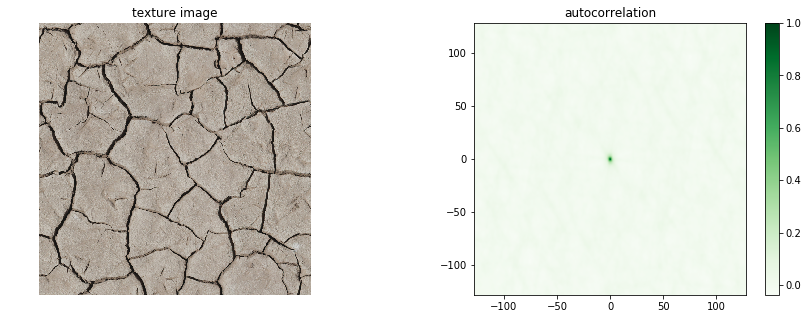

In [4]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 5))

ax1.imshow(texture_image)
ax1.axis('off')
ax1.set_title('texture image')

plot_autocorr = ax2.imshow(autocorr, cmap=cm.Greens, extent=[-128, 128, -128, 128])
fig.colorbar(plot_autocorr, ax=ax2)
ax2.set_title('autocorrelation');

In [5]:
synthesized_img = run_texture_synthesis(cnn, texture_image, image_size, 
                                        num_steps, device, verbose=False)

synthesized_img = Image.fromarray(histogram_matching(np.array(synthesized_img), 
                                                     np.array(texture_image)))

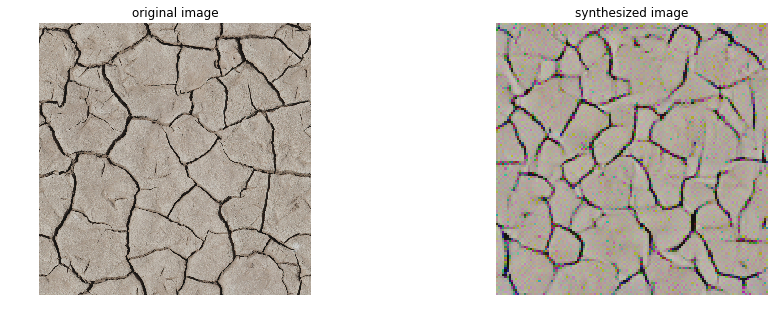

In [6]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 5))

ax1.imshow(texture_image)
ax1.axis('off')
ax1.set_title('original image')

ax2.imshow(synthesized_img)
ax2.axis('off')
ax2.set_title('synthesized image');